In [1]:
# Función para generar la semilla del laboratorio
def generar_numero_semilla(dni):
    """
    Genera un número semilla de 8 dígitos basado en el número de identidad (DNI).

    Args:
        dni (str): DNI completo, incluyendo la letra al final.

    Returns:
        int: Número semilla compuesto por 8 dígitos como un entero.
    """
    # Definir el mapeo para convertir la letra final a su correspondiente número según la tabla
    letra_a_numero = {
        'T': 0, 'R': 1, 'W': 2, 'A': 3, 'G': 4, 'M': 5, 'Y': 6, 'F': 7,
        'P': 8, 'D': 9, 'X': 10, 'B': 11, 'N': 12, 'J': 13, 'Z': 14, 'S': 15,
        'Q': 16, 'V': 17, 'H': 18, 'L': 19, 'C': 20, 'K': 21, 'E': 22
    }

    # Extraer la parte numérica del DNI
    dni_numerico = ''.join(filter(str.isdigit, dni))

    # Añadir el número correspondiente a la letra final
    letra_final = dni[-1].upper()
    if letra_final in letra_a_numero:
        dni_numerico += str(letra_a_numero[letra_final])

    # Asegurarse de que el DNI tiene al menos 8 dígitos
    while len(dni_numerico) < 8:
        dni_numerico += dni_numerico[:8 - len(dni_numerico)]

    # Obtener los primeros 8 dígitos desde la derecha
    numero_semilla = dni_numerico[-8:]

    # Sustituir dígitos menores que 2 por el número 2
    numero_semilla = ''.join([str(max(int(c), 2)) for c in numero_semilla])

    return int(numero_semilla)

In [5]:
# Creo conjunto de datos
dni = "48506658A";
id_lab = generar_numero_semilla(dni);

n_samples_lab = 200 + 10 * int(str(id_lab)[0]);
n_features_lab = 10 + int(str(id_lab)[1]) + int(str(id_lab)[2]);
n_informative_lab = 10 + int(str(id_lab)[1]);
bias_lab = 2;
noise_lab = 10 * int(str(id_lab)[3]);
random_state_lab = id_lab;
shuffle_lab = False;

print("Número de muestras: ", n_samples_lab)
print("Número de features: ", n_features_lab)
print("Número de features informadoras: ", n_informative_lab)
print("Término independiente: ", bias_lab)
print("Semilla: ", random_state_lab)
print("Desviación estandar: ", noise_lab)

Número de muestras:  280
Número de features:  17
Número de features informadoras:  15
Término independiente:  2
Semilla:  85266583
Desviación estandar:  60


## Significado de los parámetros de entrada de make_regression
- n_samples: Especifica el número total de muestras o filas que tendrá el conjunto de datos. Cada muestra representa una observación distinta.
  
- n_features: Define el número total de características o variables predictoras en el conjunto de datos. Estas características pueden ser relevantes (informativas) o no informativas (ruido).
  
- n_informative: Indica el número de características informativas, es decir, aquellas que realmente contribuyen a la construcción del modelo lineal subyacente. Estas variables tienen un impacto directo en la salida generada.
  
- bias: Representa el término independiente o constante en el modelo lineal. Este sesgo se suma a la salida generada por las características informativas.
  
- noise: Especifica la desviación estándar del ruido gaussiano que se añade a la salida. Este ruido introduce variabilidad adicional, simulando la aleatoriedad presente en datos reales.
  
- random_state: Controla la generación de números aleatorios utilizados en la creación del conjunto de datos. Si se establece un valor entero fijo, garantiza que los datos generados sean idénticos en cada ejecución, lo que facilita la reproducibilidad.
  
- shuffle: Determina si las muestras y las características deben mezclarse aleatoriamente o mantenerse en el orden en que se generan. Esto afecta cómo se distribuyen las observaciones y las variables.ables.
iables.


## Descripción del conjunto de datos

En primer lugar se genera un problema de regresión de forma aleatoria.

In [10]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = n_samples_lab, 
                       n_features = n_features_lab, 
                       n_informative = n_informative_lab,
                       bias = bias_lab,
                       noise = noise_lab, 
                       random_state = random_state_lab,
                       shuffle = shuffle_lab
                      );

Se aplican métodos info, describe, head, tail, entre otros.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir X e y en un DataFrame para análisis
data = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
data['Target'] = y

# Descripción de los datos
print(data.info(), "\n")
print(data.describe(), "\n")
print(data.head(), "\n")
print(data.tail(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   280 non-null    float64
 1   Feature_2   280 non-null    float64
 2   Feature_3   280 non-null    float64
 3   Feature_4   280 non-null    float64
 4   Feature_5   280 non-null    float64
 5   Feature_6   280 non-null    float64
 6   Feature_7   280 non-null    float64
 7   Feature_8   280 non-null    float64
 8   Feature_9   280 non-null    float64
 9   Feature_10  280 non-null    float64
 10  Feature_11  280 non-null    float64
 11  Feature_12  280 non-null    float64
 12  Feature_13  280 non-null    float64
 13  Feature_14  280 non-null    float64
 14  Feature_15  280 non-null    float64
 15  Feature_16  280 non-null    float64
 16  Feature_17  280 non-null    float64
 17  Target      280 non-null    float64
dtypes: float64(18)
memory usage: 39.5 KB
None 

        Feature_1   Featur

Se aplica un análisis gráfico

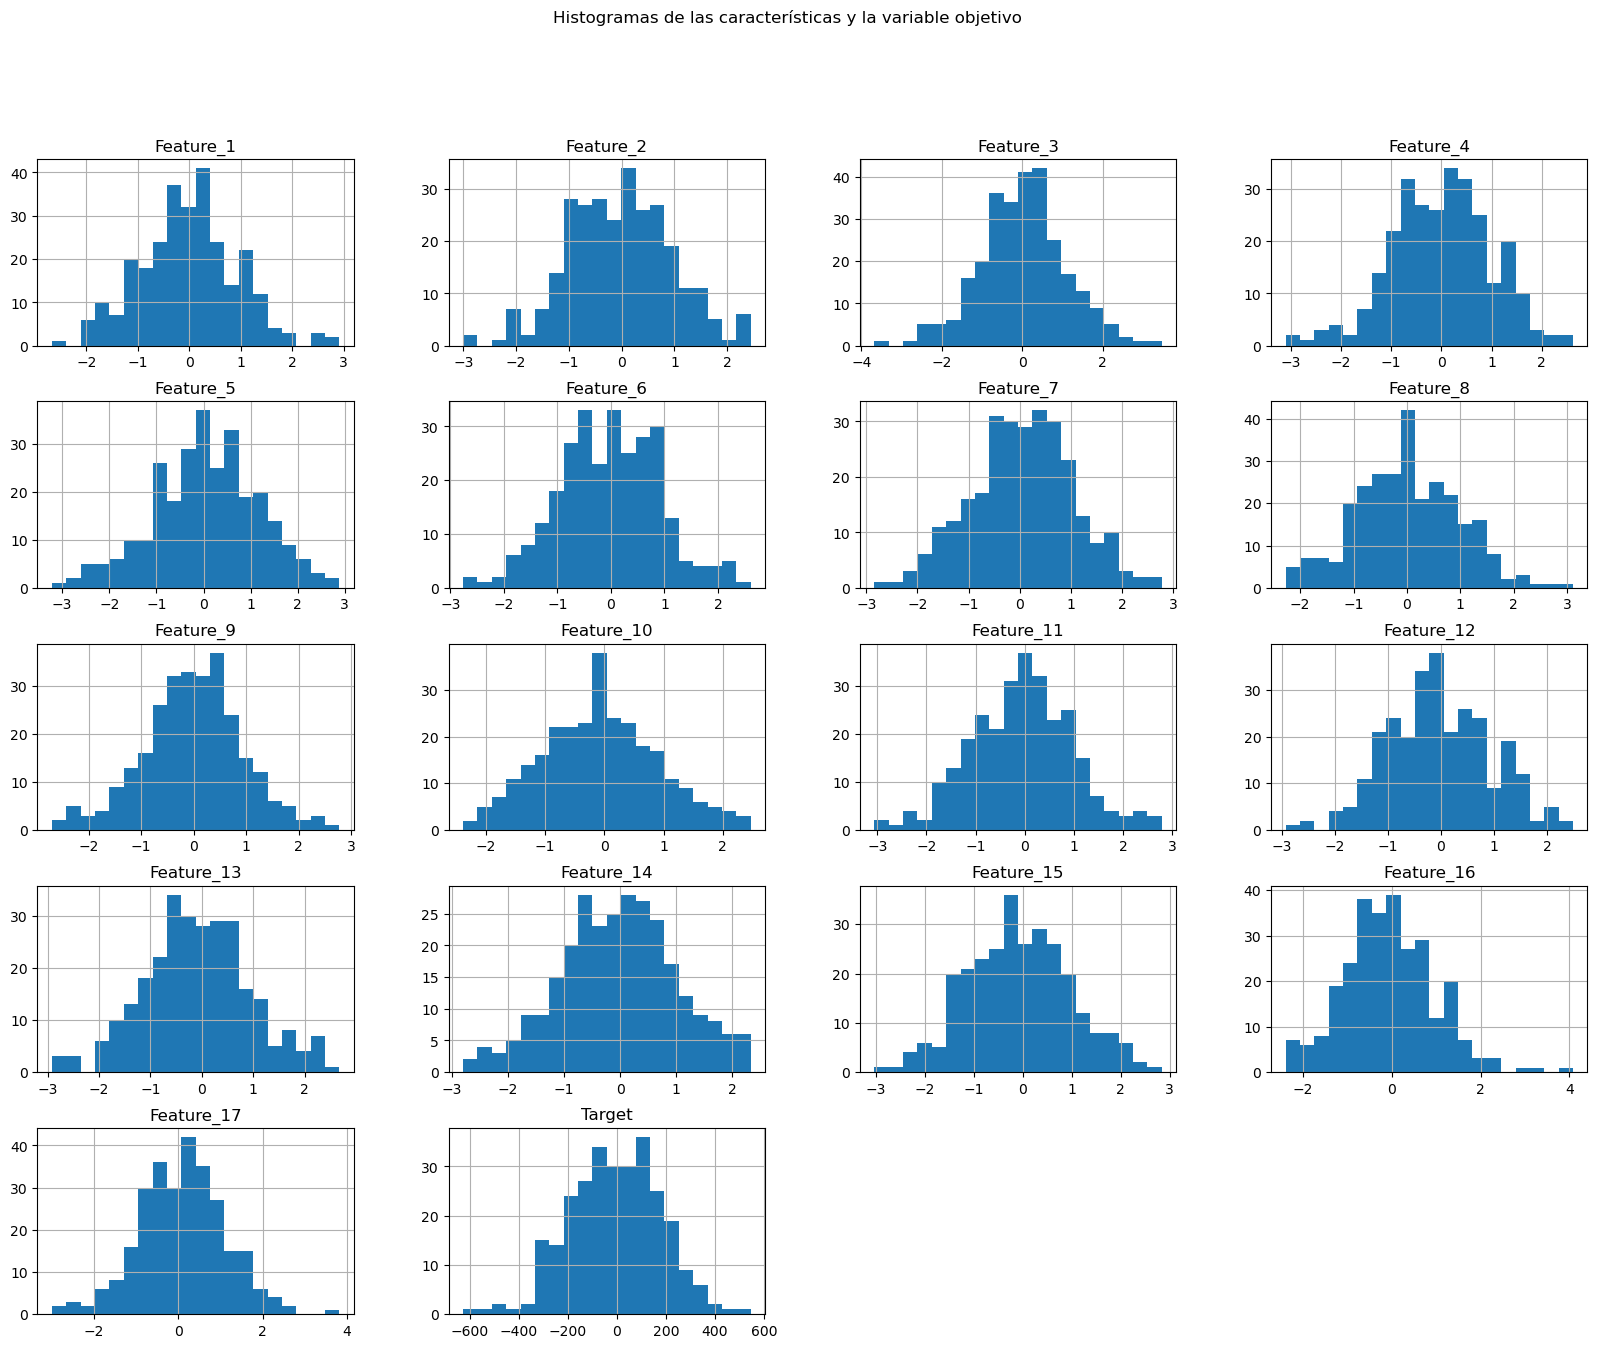

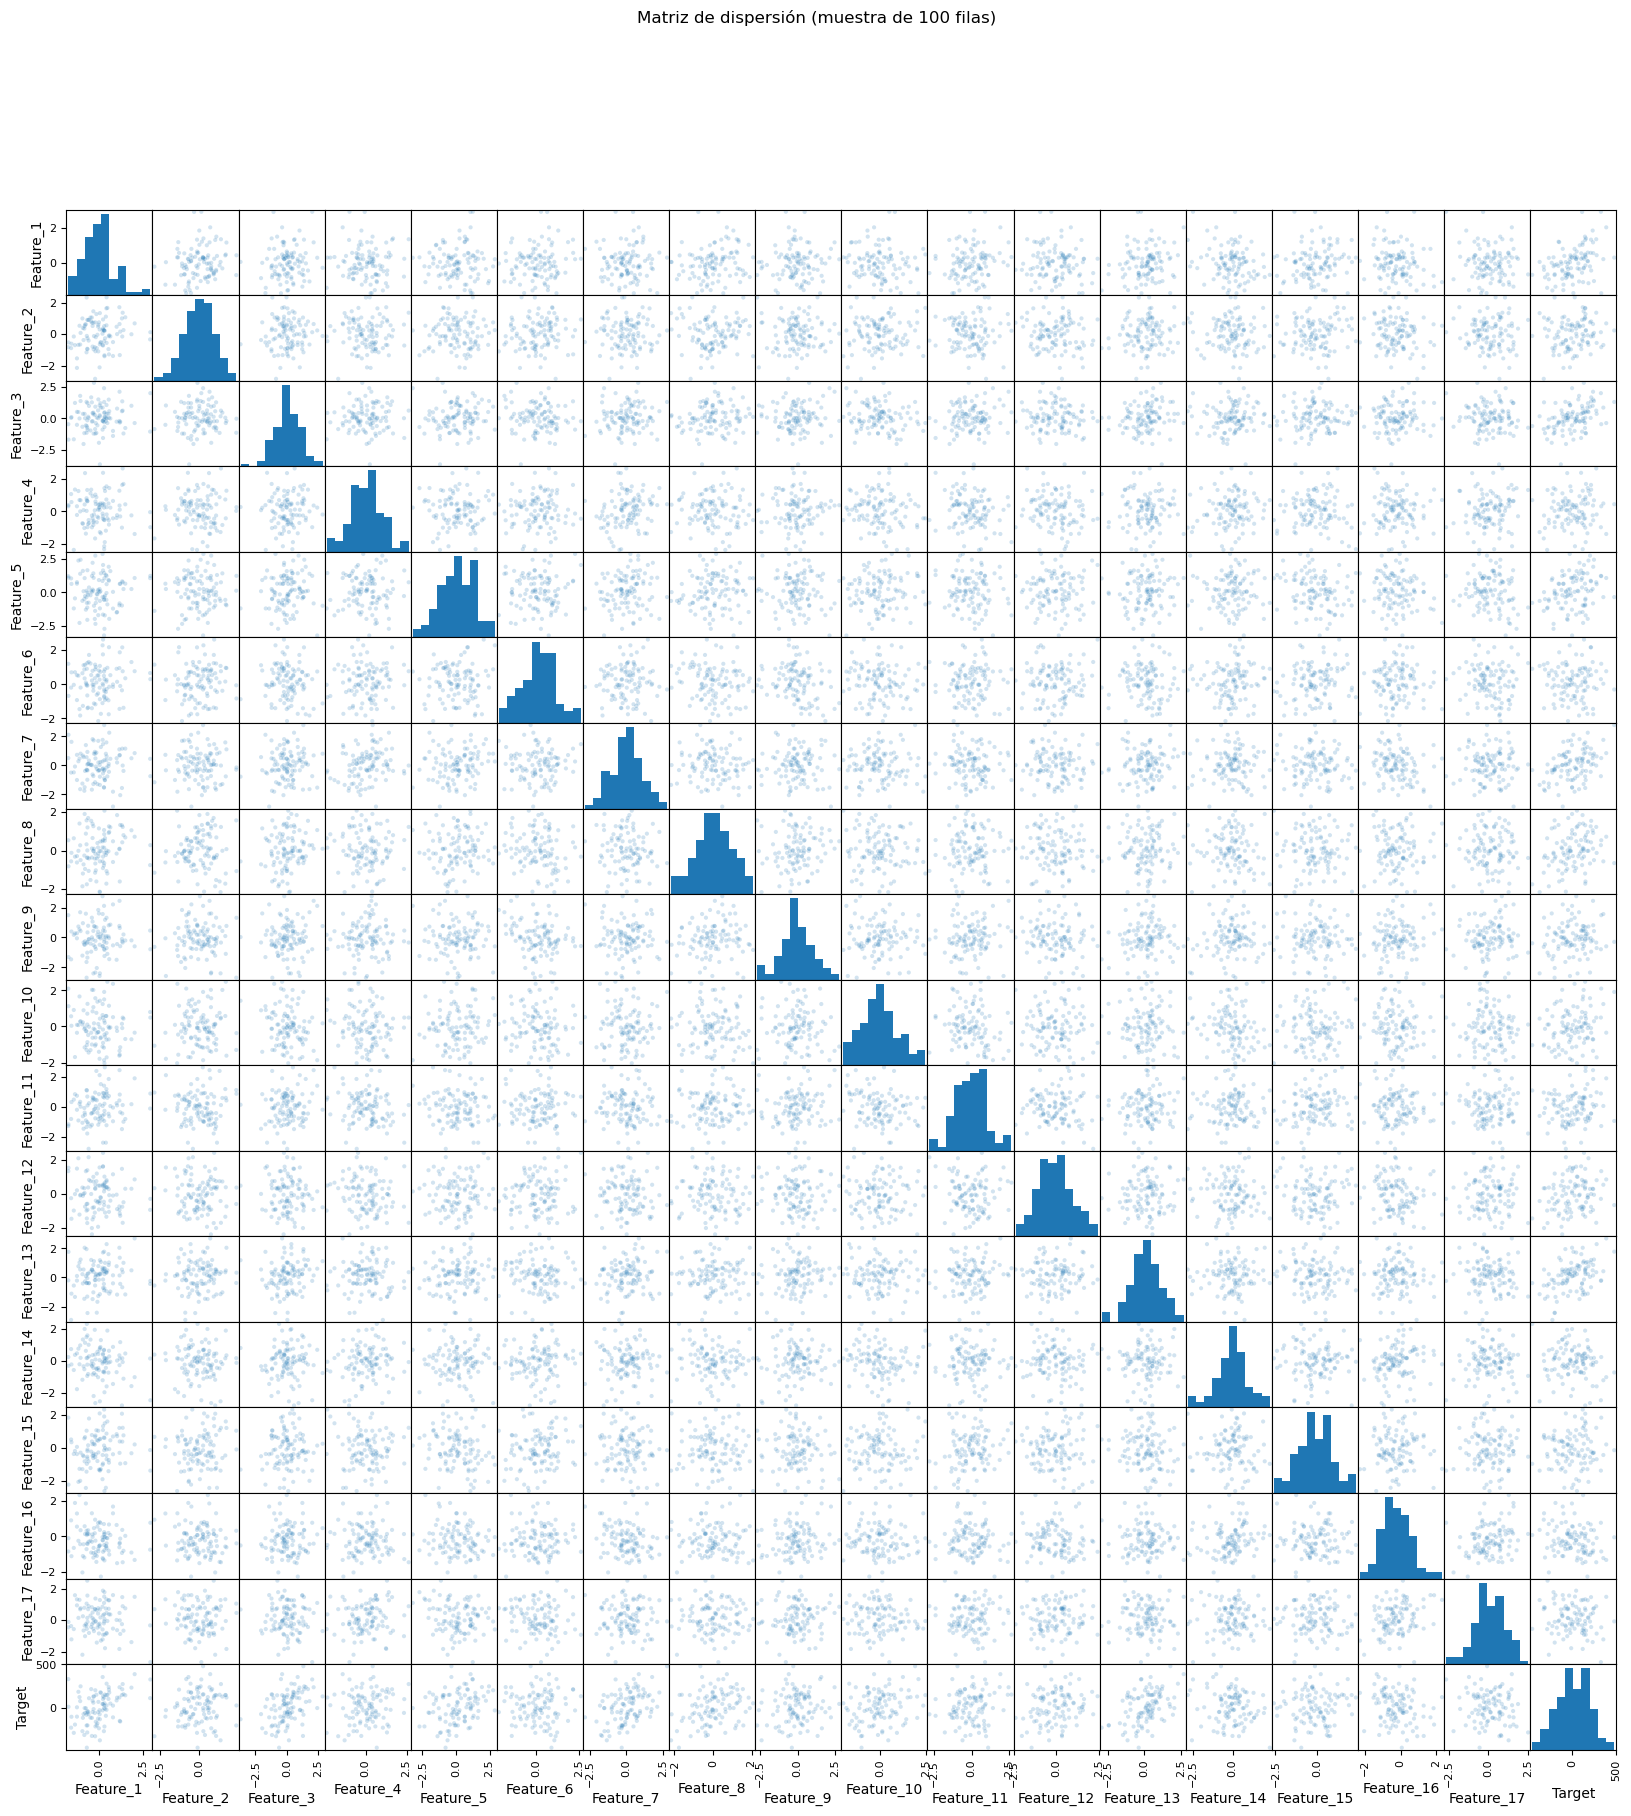

In [15]:
# Análisis gráfico
# Histogramas de las características y la variable objetivo
data.hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogramas de las características y la variable objetivo")
plt.show()

# Matriz de dispersión
pd.plotting.scatter_matrix(data.sample(100, random_state=random_state_lab), figsize=(20, 20), alpha=0.2)
plt.suptitle("Matriz de dispersión (muestra de 100 filas)")
plt.show()


## División del conjunto de datos (200 para entrenamiento)

In [17]:
# definir funcion particiones------------------------------------
import numpy as np
def particiones(dataset, test_part, seed = None):
    test_part_size = int(len(dataset) * test_part)
    rng = np.random.default_rng(seed)  # Generador de números aleatorios con semilla
    mezclar_indices = rng.permutation(len(dataset)) # Permutación reproducible
    test_indices = mezclar_indices[:test_part_size]
    train_indices = mezclar_indices[test_part_size:]
    return dataset.iloc[train_indices], dataset.iloc[test_indices]
# usar funcion particiones con train_set 200---------------------
train_set, test_set = particiones(data, ((len(data)-200)/(len(data))), seed = 2)

# comprobar longitudes de los set de entrenamiento y de test-----
print("Train set (length): ", len(train_set))
print("Test set (length): ", len(test_set))

Train set (length):  200
Test set (length):  80


## Obtención de un modelo de regresión lineal múltiple

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar variables predictoras y objetivo para entrenamiento y prueba
X_train = train_set.drop('Target', axis=1)
y_train = train_set['Target']

X_test = test_set.drop('Target', axis=1)
y_test = test_set['Target']

# Crear y entrenar el modelo de regresión lineal
modelo_sk = LinearRegression()
modelo_sk.fit(X_train, y_train)

# Evaluar el modelo
r2_train = modelo_sk.score(X_train, y_train)  # R² en entrenamiento
r2_test = modelo_sk.score(X_test, y_test)     # R² en prueba

print(f"R² (entrenamiento): {r2_train:.2f}")
print(f"R² (prueba): {r2_test:.2f}")

# Obtener los coeficientes del modelo
coeficientes = modelo_sk.coef_
interseccion = modelo_sk.intercept_

print("Intersección (bias):", interseccion)
print("Coeficientes:", coeficientes)

# Analizar predicciones
y_pred = modelo_sk.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")


R² (entrenamiento): 0.92
R² (prueba): 0.83
Intersección (bias): 1.215692959657863
Coeficientes: [81.8444857  14.41343151 54.16620925 30.85914803 24.0663793   1.28721395
 70.02522205 45.21613534 12.37063528 78.44575249 24.19787406 65.17998027
 46.67739963  2.96518473  4.22733415  6.32790765 -4.9599242 ]
Error cuadrático medio (MSE): 4937.77


El modelo tiene un ajuste sólido (R^2=0.915), con características predictoras significativas que explican la mayor parte de la variabilidad en la variable objetivo. Sin embargo, algunas variables no significativas (p > 0.05), como Feature_6, Feature_14, y Feature_17, podrían eliminarse para simplificar el modelo sin comprometer su capacidad predictiva. Además, los diagnósticos del modelo (residuos normales, ausencia de autocorrelación, y baja multicolinealidad) sugieren que el modelo está bien ajustado a los datos y es robusto. 

Con statsmodel podemos ver la significancia de las variables

In [21]:
# Usar statsmodels para analizar la significancia
import statsmodels.api as sm

# Añadir constante para el término independiente (bias o intercepto)
X_train_sm = sm.add_constant(X_train)

# Crear el modelo y ajustarlo a los datos
modelo_sm = sm.OLS(y_train, X_train_sm).fit()

# Mostrar resumen del modelo
print(modelo_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           9.13e-88
Time:                        17:38:23   Log-Likelihood:                -1087.4
No. Observations:                 200   AIC:                             2211.
Df Residuals:                     182   BIC:                             2270.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2157      4.259      0.285      0.7

El modelo tiene un ajuste sólido (R^2=0.915), con características predictoras significativas que explican la mayor parte de la variabilidad en la variable objetivo. Sin embargo, algunas variables no significativas (p > 0.05), como Feature_6, Feature_14, y Feature_17, podrían eliminarse para simplificar el modelo sin comprometer su capacidad predictiva. Además, los diagnósticos del modelo (residuos normales, ausencia de autocorrelación, y baja multicolinealidad) sugieren que el modelo está bien ajustado a los datos y es robusto.

A partir de los resultados del análisis de regresión, podemos eliminar las variables predictoras que no son significativas estadísticamente (aquellas con valores p > 0.05 en la columna P>|t|).

## Selección de variables mediante un algoritmo de tipo stepwise

In [27]:
import statsmodels.api as sm

def algoritmo_stepwise(X_train, y_train, umbral_p=0.05):
    """
    Ejecuta el algoritmo de tipo stepwise para seleccionar las variables más significativas.

    Args:
        X_train (pd.DataFrame): Conjunto de características de entrenamiento.
        y_train (pd.Series): Variable objetivo de entrenamiento.
        umbral_p (float): Umbral de significancia para la selección de variables.

    Returns:
        modelo_stepwise: Modelo OLS ajustado con las variables seleccionadas.
        variables_seleccionadas (list): Lista de variables significativas seleccionadas.
    """
    # Inicializar variables predictoras
    variables_restantes = list(X_train.columns)

    while True:
        # Ajustar el modelo con las variables restantes
        X_train_sm = sm.add_constant(X_train[variables_restantes])  # Añadir constante
        modelo = sm.OLS(y_train, X_train_sm).fit()

        # Obtener los valores p de las variables
        p_values = modelo.pvalues.iloc[1:]  # Excluye la constante
        p_max = p_values.max()  # Valor p más alto
        variable_p_max = p_values.idxmax()  # Variable con el valor p más alto

        # Verificar si el proceso debe continuar
        if p_max > umbral_p:
            # Eliminar la variable con el p-valor más alto
            variables_restantes.remove(variable_p_max)
            print(f"Eliminando la variable '{variable_p_max}' por no ser significativa (p = {p_max:.3f})")
        else:
            print("Todas las variables restantes son significativas.")
            break

    # Ajustar el modelo final con las variables seleccionadas
    X_train_sm_stepwise = sm.add_constant(X_train[variables_restantes])
    modelo_stepwise = sm.OLS(y_train, X_train_sm_stepwise).fit()

    return modelo_stepwise, variables_restantes

# Ejemplo de uso:
modelo_stepwise, variables_seleccionadas = algoritmo_stepwise(X_train, y_train)
print(modelo_stepwise.summary())
print("Variables seleccionadas:", variables_seleccionadas)

# Analizar predicciones
X_test_stepwise = sm.add_constant(X_test[variables_seleccionadas])
y_pred = modelo_stepwise.predict(X_test_stepwise)
mse_sw = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse_sw:.2f}")


Eliminando la variable 'Feature_6' por no ser significativa (p = 0.780)
Eliminando la variable 'Feature_14' por no ser significativa (p = 0.489)
Eliminando la variable 'Feature_15' por no ser significativa (p = 0.263)
Eliminando la variable 'Feature_17' por no ser significativa (p = 0.216)
Eliminando la variable 'Feature_16' por no ser significativa (p = 0.129)
Todas las variables restantes son significativas.
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     162.3
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           5.80e-92
Time:                        17:44:58   Log-Likelihood:                -1090.4
No. Observations:                 200   AIC:                             2207.
Df Residuals:                    

In [36]:
# Preparación de variables significativas para la aplicación de los modelos de regresión.
#X_train=X_train[variables_seleccionadas]
#X_test=X_test[variables_seleccionadas]

## Regresión de tipo Ridge
La regresión Ridge es una forma de regresión lineal que incluye una penalización para reducir el tamaño de los coeficientes, útil cuando hay multicolinealidad o cuando algunos coeficientes son extremadamente grandes.

El parámetro 𝛼 controla la fuerza de la penalización:
- Valores bajos de 𝛼(𝛼→0) hacen que Ridge se acerque a una regresión lineal estándar.
- Valores altos de 𝛼 aumentan la penalización, reduciendo el tamaño de los coeficientes.


Alpha: 0.01
R² (train): 0.9151
R² (test): 0.8267
Error Cuadrático Medio (MSE - test): 4937.6584
Coeficientes: [81.83975433 14.4126612  54.16408778 30.85728002 24.06516187  1.28564136
 70.02271417 45.21333413 12.37033526 78.44095421 24.19733723 65.17656155
 46.67501296  2.96438213  4.22781291  6.32750858 -4.9601662 ]

Alpha: 0.1
R² (train): 0.9151
R² (test): 0.8267
Error Cuadrático Medio (MSE - test): 4936.6685
Coeficientes: [81.79719867 14.40573149 54.14500331 30.84047907 24.05421007  1.27150431
 70.00014963 45.18814004 12.36763621 78.39779669 24.19250553 65.14581039
 46.65354463  2.95716602  4.23211578  6.32391856 -4.96234075]

Alpha: 1
R² (train): 0.9150
R² (test): 0.8270
Error Cuadrático Medio (MSE - test): 4927.4467
Coeficientes: [81.37426385 14.33673156 53.95501798 30.67356132 23.94519824  1.13172938
 69.77513307 44.93785268 12.34075494 77.96888085 24.14416135 64.83999919
 46.4400124   2.8857171   4.27455851  6.28818459 -4.9837444 ]

Alpha: 10
R² (train): 0.9130
R² (test): 0.8281

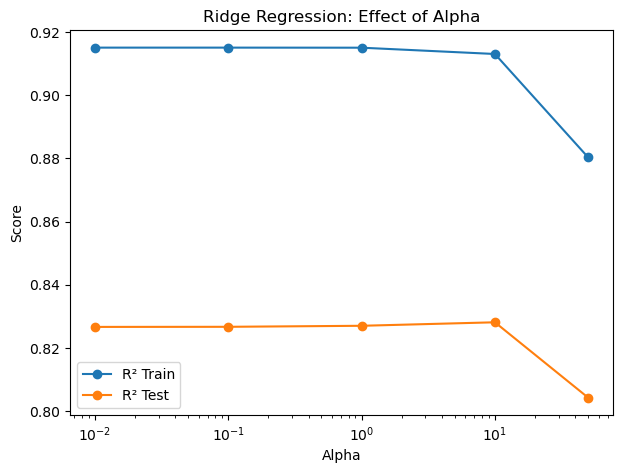

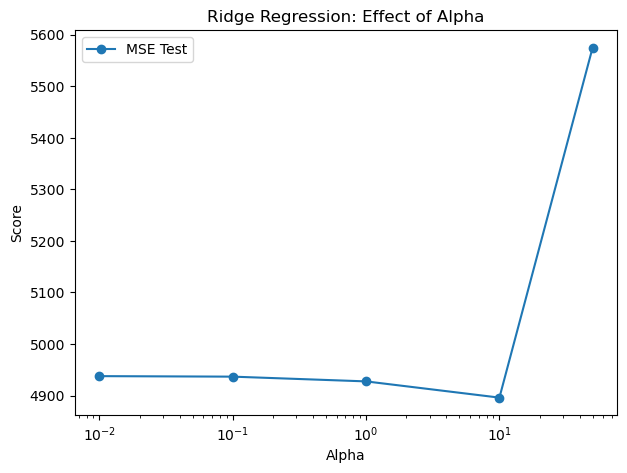

In [29]:
from sklearn.linear_model import Ridge

# Valores de alpha para probar
alpha_values = [0.01, 0.1, 1, 10, 50]

# Almacenar resultados
train_r2_rid, test_r2_rid, mse_rid = [], [], []

# Evaluar Ridge para cada alpha
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    
    # Predicciones y métricas
    y_pred_train = ridge_model.predict(X_train)
    y_pred_test = ridge_model.predict(X_test)
    train_r2_rid.append(r2_score(y_train, y_pred_train))
    test_r2_rid.append(r2_score(y_test, y_pred_test))
    mse_rid.append(mean_squared_error(y_test, y_pred_test))
    
    print(f"\nAlpha: {alpha}")
    print(f"R² (train): {train_r2_rid[-1]:.4f}")
    print(f"R² (test): {test_r2_rid[-1]:.4f}")
    print(f"Error Cuadrático Medio (MSE - test): {mse_rid[-1]:.4f}")
    print(f"Coeficientes: {ridge_model.coef_}")

# Graficar R²
plt.figure(figsize=(7, 5))
plt.plot(alpha_values, train_r2_rid, label="R² Train", marker='o')
plt.plot(alpha_values, test_r2_rid, label="R² Test", marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Ridge Regression: Effect of Alpha")
plt.legend()
plt.show()

# Graficar MSE
plt.figure(figsize=(7, 5))
plt.plot(alpha_values, mse_rid, label="MSE Test", marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Ridge Regression: Effect of Alpha")
plt.legend()
plt.show()

Los resultados de la regresión Ridge muestran que, con valores bajos de 𝛼 (0.01-1), el modelo mantiene un alto R² de entrenamiento (0.915) y de prueba (0.827), con un MSE que disminuye progresivamente hasta 4927.45 en α=1. A medida que α aumenta, la regularización se intensifica, reduciendo los coeficientes de las características más influyentes, como Feature_1 y Feature_10, y penalizando aquellas menos relevantes. Esto mejora ligeramente el R² de prueba en α=10 (R^2  =0.8281, MSE = 4895.96), pero al seguir incrementando alpha (α=50), el modelo pierde capacidad predictiva (R^2  =0.8043, MSE = 5575.07), lo que indica una penalización excesiva. En general, α=10 parece ofrecer el mejor equilibrio entre regularización y desempeño predictivo.

## Regresión tipo Lasso
La regresión Lasso (Least Absolute Shrinkage and Selection Operator) es una técnica de regularización que, además de penalizar los coeficientes grandes, puede llevar algunos coeficientes a exactamente cero, lo que permite realizar una selección automática de variables.


Alpha: 0.01
R² (train): 0.9151
R² (test): 0.8267
Error Cuadrático Medio (MSE - test): 4936.3021
Coeficientes: [81.83486497 14.40104074 54.15945001 30.84681645 24.05849119  1.27048717
 70.01880859 45.20597836 12.35984866 78.42809151 24.18969185 65.16891637
 46.66773646  2.95517942  4.2208583   6.31578369 -4.95162346]

Alpha: 0.1
R² (train): 0.9150
R² (test): 0.8272
Error Cuadrático Medio (MSE - test): 4923.2565
Coeficientes: [81.74786138 14.28959822 54.09887687 30.7356064  23.98749031  1.11984692
 69.9612047  45.11455824 12.26265736 78.26907655 24.11598362 65.0692908
 46.58083373  2.86502667  4.16256819  6.20674929 -4.87694718]

Alpha: 1
R² (train): 0.9146
R² (test): 0.8312
Error Cuadrático Medio (MSE - test): 4808.7762
Coeficientes: [80.8812536  13.16526327 53.54231616 29.62357873 23.25241149  0.
 69.38173899 44.22330558 11.31381138 76.71771928 23.38060432 64.10522026
 45.72268808  1.95800123  3.53655981  5.13685792 -4.1376606 ]

Alpha: 10
R² (train): 0.8806
R² (test): 0.8229
Error Cu

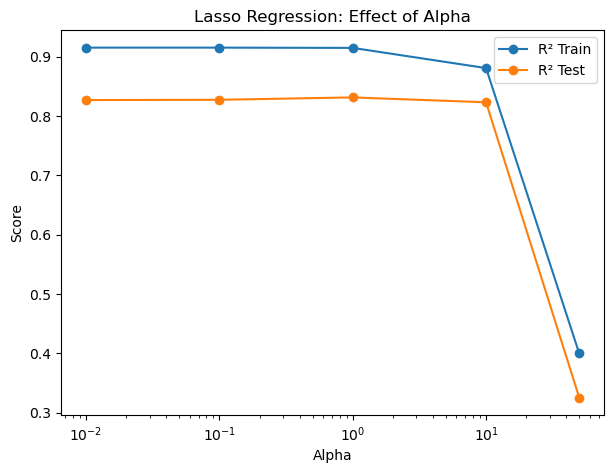

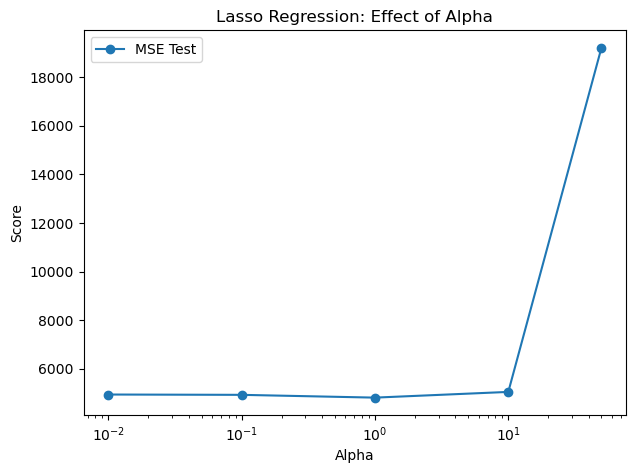

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Valores de alpha para probar
alpha_values = [0.01, 0.1, 1, 10, 50]

# Almacenar resultados
train_r2_las, test_r2_las, mse_las, coefficients_las = [], [], [], []

# Evaluar Lasso para cada alpha
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    
    # Predicciones y métricas
    y_pred_train = lasso_model.predict(X_train)
    y_pred_test = lasso_model.predict(X_test)
    train_r2_las.append(r2_score(y_train, y_pred_train))
    test_r2_las.append(r2_score(y_test, y_pred_test))
    mse_las.append(mean_squared_error(y_test, y_pred_test))
    coefficients_las.append(lasso_model.coef_)
    
    print(f"\nAlpha: {alpha}")
    print(f"R² (train): {train_r2_las[-1]:.4f}")
    print(f"R² (test): {test_r2_las[-1]:.4f}")
    print(f"Error Cuadrático Medio (MSE - test): {mse_las[-1]:.4f}")
    print(f"Coeficientes: {coefficients_las[-1]}")

# Graficar R²
plt.figure(figsize=(7, 5))
plt.plot(alpha_values, train_r2_las, label="R² Train", marker='o')
plt.plot(alpha_values, test_r2_las, label="R² Test", marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Lasso Regression: Effect of Alpha")
plt.legend()
plt.show()

# Graficar MSE
plt.figure(figsize=(7, 5))
plt.plot(alpha_values, mse_las, label="MSE Test", marker='o')
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Lasso Regression: Effect of Alpha")
plt.legend()
plt.show()

Los resultados de la regresión Lasso muestran que, con valores bajos de 𝛼 = [0.01-1], el modelo mantiene un alto R² de entrenamiento (0.915) y de prueba (0.827), con un MSE que disminuye progresivamente hasta 4808.78 en α=1. A medida que α aumenta, la regularización intensifica la penalización de coeficientes irrelevantes, llevando algunos a cero, como se observa en α=10 y α=50 donde las características menos relevantes son eliminadas. Aunque esto simplifica el modelo, la capacidad predictiva disminuye notablemente con α=50 (R^2  =0.3998, MSE = 19216.58) indicando un exceso de penalización. El mejor equilibrio entre simplicidad y desempeño se observa en α=1, donde el modelo conserva las variables más importantes y logra el menor MSE.

## Regresión mediante Red Elástica

La Red Elástica combina las técnicas de regularización Lasso y Ridge, utilizando un término de mezcla 𝑟 para controlar el balance entre ambas:
- 𝑟 = 0 equivalente a Ridge (regularización L2).
- 𝑟 = 1: Equivalente a Lasso (regularización L1).
- 0 < 𝑟 < 1: Mezcla de L1 y L2.

In [44]:
from sklearn.linear_model import ElasticNetCV

# Definir valores de alpha y r para probar
alpha_values = np.logspace(-2, 2, 100)  # 100 valores entre 0.01 y 100
l1_ratios = np.linspace(0.1, 1, 100)  # r desde 0 a 1 en pasos de 0.1

# Crear el modelo ElasticNetCV con validación cruzada
elastic_net_cv = ElasticNetCV(alphas=alpha_values, l1_ratio=l1_ratios, cv=6, max_iter=10000)
elastic_net_cv.fit(X_train, y_train)

# Parámetros óptimos
optimal_alpha_en = elastic_net_cv.alpha_
optimal_l1_ratio_en = elastic_net_cv.l1_ratio_

# Predicción y evaluación del modelo final
y_pred_train = elastic_net_cv.predict(X_train)
y_pred_test = elastic_net_cv.predict(X_test)

train_r2_en = r2_score(y_train, y_pred_train)
test_r2_en = r2_score(y_test, y_pred_test)
mse_en = mean_squared_error(y_test, y_pred_test)

# Resultados
print(f"Alpha óptimo: {optimal_alpha_en}")
print(f"L1 ratio óptimo (r): {optimal_l1_ratio_en}")
print(f"R² (train): {train_r2_en:.4f}")
print(f"R² (test): {test_r2_en:.4f}")
print(f"MSE (test): {mse_en:.4f}")
print(f"Coeficientes: {elastic_net_cv.coef_}")


Alpha óptimo: 1.5199110829529348
L1 ratio óptimo (r): 1.0
R² (train): 0.9140
R² (test): 0.8331
MSE (test): 4754.5528
Coeficientes: [80.39283317 12.50213622 53.29379511 28.9896925  22.78931094  0.
 69.04020045 43.74846792 10.8068093  75.88938745 22.96001117 63.60042262
 45.24505789  1.42578592  3.10391358  4.55213771 -3.72224139]


- El valor óptimo de 𝛼 indica la intensidad de la regularización aplicada. Con este valor, Elastic Net penaliza los coeficientes lo suficiente para controlar el sobreajuste sin comprometer la capacidad predictiva del modelo. Esto se refleja en un R²(train): 0.9140 y un R²(test): 0.8331, que muestran un buen equilibrio entre ajuste y generalización. Además, el modelo logra el menor Error Cuadrático Medio (MSE (test): 4754.55) si lo comparamos con el modelo de Ridge y el Lasso, lo que confirma que este nivel de regularización ayuda a mejorar la precisión del modelo al manejar características irrelevantes y ruido en los datos.- 	Este valor implica que Elastic Net se comporta como un modelo Lasso puro, priorizando la selección de variables al llevar coeficientes de características menos relevantes a cero, como se observa en Feature_6. Este enfoque permite identificar las variables más importantes (Feature_1, Feature_10, Feature_12) mientras simplifica el modelo al eliminar redundancias. La combinación de penalización L1 y L2 característica de Elastic Net no se aplica en este caso, pero el modelo conserva la capacidad de manejo eficiente de multicolinealidad, ofreciendo una solución que equilibra simplicidad y precisión predictiva.



MSE Inicial: 4937.7691
MSE Stepwise: 4663.0755
MSE Ridge: 4895.9617
MSE Lasso: 4808.7762
MSE Elastic Net: 4754.5528
El modelo con menor MSE es: Stepwise


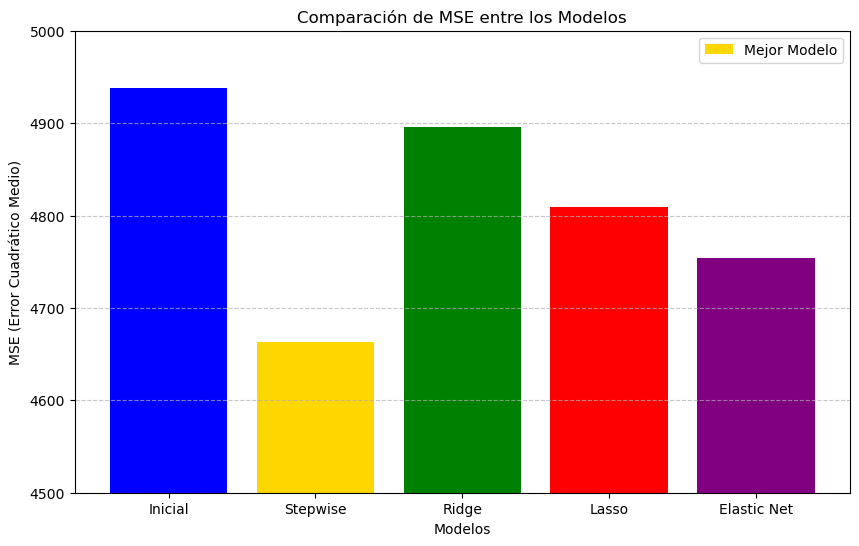

In [47]:
# Comparación de la validación de todos los métodos
print(f"MSE Inicial: {mse:.4f}")
print(f"MSE Stepwise: {mse_sw:.4f}")
print(f"MSE Ridge: { min(mse_rid):.4f}")
print(f"MSE Lasso: { min(mse_las):.4f}")
print(f"MSE Elastic Net: {mse_en:.4f}")

# Identificar el modelo con menor MSE
modelos = ['Inicial', 'Stepwise', 'Ridge', 'Lasso', 'Elastic Net']
mses = [mse, mse_sw, min(mse_rid), min(mse_las), mse_en]
mejor_modelo = modelos[np.argmin(mses)]
print(f"El modelo con menor MSE es: {mejor_modelo}")

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, mses, color=['blue', 'orange', 'green', 'red', 'purple'])

# Resaltar el modelo con menor MSE
min_mse = min(mses)
min_mse_index = np.argmin(mses)
plt.bar(modelos[min_mse_index], min_mse, color='gold', label='Mejor Modelo')

# Configurar el gráfico
plt.xlabel('Modelos')
plt.ylabel('MSE (Error Cuadrático Medio)')
plt.title('Comparación de MSE entre los Modelos')
plt.ylim(4500, 5000)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


El modelo Stepwise logra el menor MSE inicial (4663.08) al seleccionar iterativamente solo las variables estadísticamente más significativas, eliminando las irrelevantes. Esto reduce la complejidad del modelo y mitiga el impacto del ruido, logrando un ajuste eficiente en datos donde la relevancia de las variables no es evidente. Sin embargo, al carecer de regularización, su eficacia puede ser limitada en casos de alta multicolinealidad. Por otra parte:
•	Ridge: Penaliza todos los coeficientes, reduciendo su magnitud pero sin llevarlos a cero. Esto lo hace efectivo para manejar multicolinealidad, pero puede retener características irrelevantes, afectando su desempeño en términos de MSE.
•	Lasso: Combina regularización y selección de variables, llevando a cero los coeficientes menos relevantes. Esto explica su mejor MSE comparado con Ridge, ya que simplifica el modelo al enfocarse en las variables más importantes. Sin embargo, Lasso puede eliminar características útiles en presencia de alta correlación entre ellas.
•	Elastic Net: Integra las penalizaciones L1 (como Lasso) y L2 (como Ridge), equilibrando selección de variables y manejo de multicolinealidad. Su MSE más bajo entre los métodos de regularización indica que logra el mejor compromiso entre simplicidad del modelo y capacidad predictiva. En cualquier caso, en esta ocasión, Elastic Net se comporta como un Lasso puro, pero lo mejora por el hecho de optimizar el coeficiente de regularización.